In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## read and describe the metadata

In [2]:
fpn_csv = '/Users/working/Documents/ParsonsSchool/Sp19/MachineLearning/MLProject/ML3option_2/cluster_images.csv'
data = pd.read_csv(fpn_csv, encoding='ISO-8859-1')

In [3]:
# get column names
list(data)

['s_no',
 'artist',
 'title',
 'art_movement',
 'museum_venue',
 'country_of_origin',
 'has_text',
 'primary_medium',
 'medium',
 'work_size',
 'date',
 'representation',
 'representation_semi',
 'kinetic',
 'map',
 'map2',
 'spatial_dimension',
 'spatial_dimension2',
 'pl',
 'si',
 'va',
 'te',
 'co',
 'or',
 'sh',
 'reflection',
 'po',
 'li',
 'ar',
 'notes']

In [4]:
data.head()

s_no              artist                         title art_movement  \
0     2  Giorgio de Chirico  The Uncertainty of the Poet    surrealism   
1     3    Giovanni Anselmo                     Direction  arte povera   
2     4        Milton Avery                   Yellow Sky     modernism   
3     5       Gillian Avery                  Distillation  abstraction   
4     6   Joseph (Jef) Banc          Pair-Bearing Matrix   abstraction   

  museum_venue country_of_origin  has_text primary_medium  \
0         Tate             Italy     False       painting   
1         Tate             Italy     False      sculpture   
2         Tate           America     False       painting   
3         Tate                UK     False       painting   
4         Tate            France     False       painting   

                                        medium          work_size  ... va  te  \
0                      painting, oil on canvas        106 x 94 cm  ...  3   0   
1             sculpture, fabric, glass & metal  24 x 420 x 335 cm  ...  1   3   
2                      painting, oil on canvas       156 x 184 cm  ...  2   4   
3  painting, oil, household paint on hardboard       213 x 152 cm  ...  1   2   
4              painting, mixed media on canvas         73 x 60 cm  ...  1   4   

   co  or  sh  reflection  po  li  ar  \
0   0   4   3       False   0   0   5   
1   0   3   2       False   0   0   5   
2   4   2   4       False   0   0   5   
3   0   2   4       False   0   0   5   
4   1   0   4       False   0   0   5   

                                               notes  
0  distorted perspective, shadow, signification o...  
1  hard to understand the viewpoint, sense of for...  
2  flatish, textured shapes & specific colors-lin...  
3  shapes, layers, paint handlng/texture, orienta...  
4  ambiguity through abstraction, odd shape, v te...  

[5 rows x 30 columns]

### Label Encoder

In [5]:
from sklearn import preprocessing
data['priMediumDigital']=data['primary_medium']
print(data['priMediumDigital'].head(5))
le = preprocessing.LabelEncoder()
priMedium=le.fit(data['priMediumDigital'])
print(list(priMedium.classes_))
data['priMediumDigital']=priMedium.transform(data['priMediumDigital'])
print(print(data['priMediumDigital'].head(5)))




0     painting
1    sculpture
2     painting
3     painting
4     painting
Name: priMediumDigital, dtype: object
['drawing', 'installation', 'painting', 'photography', 'print', 'sculpture', 'video_film']
0    2
1    5
2    2
3    2
4    2
Name: priMediumDigital, dtype: int64
None


## create a subset of the columns you will use to fit KMeans

Here, I am **arbitrarily** choosing the seven [visual variables defined by Bertin](http://www.infovis-wiki.net/index.php?title=Visual_Variables#Jaques_Bertin). Variable descriptions [here](https://github.com/visualizedata/ml/blob/master/ML_assignment_3/contents-of-cluster_images.csv). 

You should choose the columns that you decide will best define the clusters. You may need to make transformations on existing variables. 

In [971]:
# X = data[[ 'va','co','sh','li','ar','te']]
# X = data[['priMediumDigital']]   # 7 seven clusters will do the work
# X = data[['priMediumDigital','si','te','sh','representation']]   #100 clusters look good
# X = data[['priMediumDigital', 'te','representation']] #50-60 clusters

# X = data[['priMediumDigital', 'te','sh']]#

# X = data[['priMediumDigital', 'ar','li']] #35 clusters
# X = data[['priMediumDigital', 'ar','or']] #35 clusters
# X = data[['priMediumDigital','li','te','or']] #120 clusters
# X = data[['priMediumDigital','li','or']] #120 clusters
# X = data[['ar','te','or','priMediumDigital']] #80 clusters
# X = data[['ar','representation','sh','or','priMediumDigital']] #80 clusters
X = data[['priMediumDigital','ar','or','has_text']] #40 clusters
# X = data[['priMediumDigital','si','ar']] #40 clusters

In [972]:
X.head()

priMediumDigital  ar  or  has_text
0                 2   5   4     False
1                 5   5   3     False
2                 2   5   2     False
3                 2   5   2     False
4                 2   5   0     False

# KMeans

In [973]:
from sklearn.cluster import KMeans

## plot inertia scores by number of clusters

/anaconda3/envs/Py36env/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (116) found smaller than n_clusters (117). Possibly due to duplicate points in X.
  return_n_iter=True)
/anaconda3/envs/Py36env/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (116) found smaller than n_clusters (118). Possibly due to duplicate points in X.
  return_n_iter=True)
/anaconda3/envs/Py36env/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (116) found smaller than n_clusters (119). Possibly due to duplicate points in X.
  return_n_iter=True)
/anaconda3/envs/Py36env/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (116) found smaller than n_clusters (120). Possibly due to duplicate points in X.
  return_n_iter=True)
/anaconda3/envs/Py36env/lib/python3.6/site-packages/

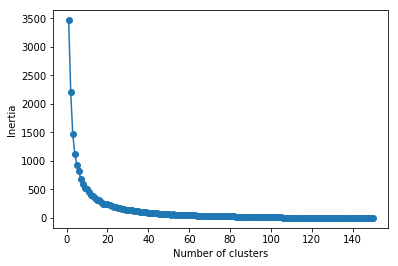

In [974]:
# first attempt at fitting K means to view change in Inertia

# container to store inertia scores over iterations
distortions = []

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(1, 151):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)
    
# vizualize change in inertia
plt.plot(range(1, 151), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## create silhouette plots to assess various specifications for `n_clusters` in `KMeans`

In [976]:
# modify this list to include the numbers of clusters you want to see
# I have *arbitrarily* chosen these values
range_n_clusters = [ 15,20,30,40,50,60,70,80,115,150]

For n_clusters = 15 The average silhouette_score is : 0.46035640963470986


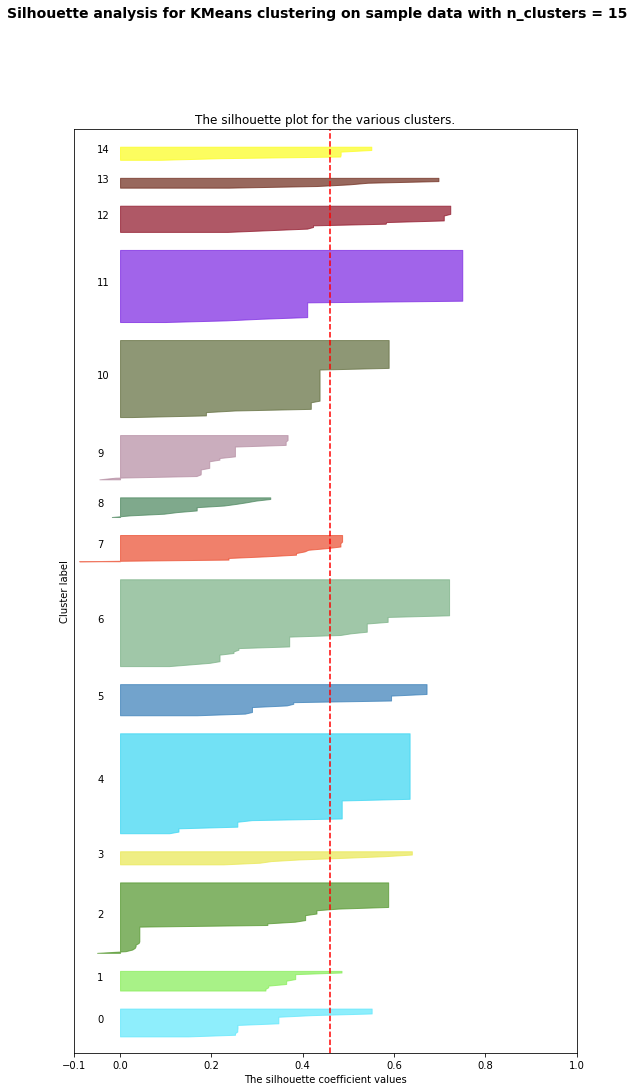

For n_clusters = 20 The average silhouette_score is : 0.5118691665997839


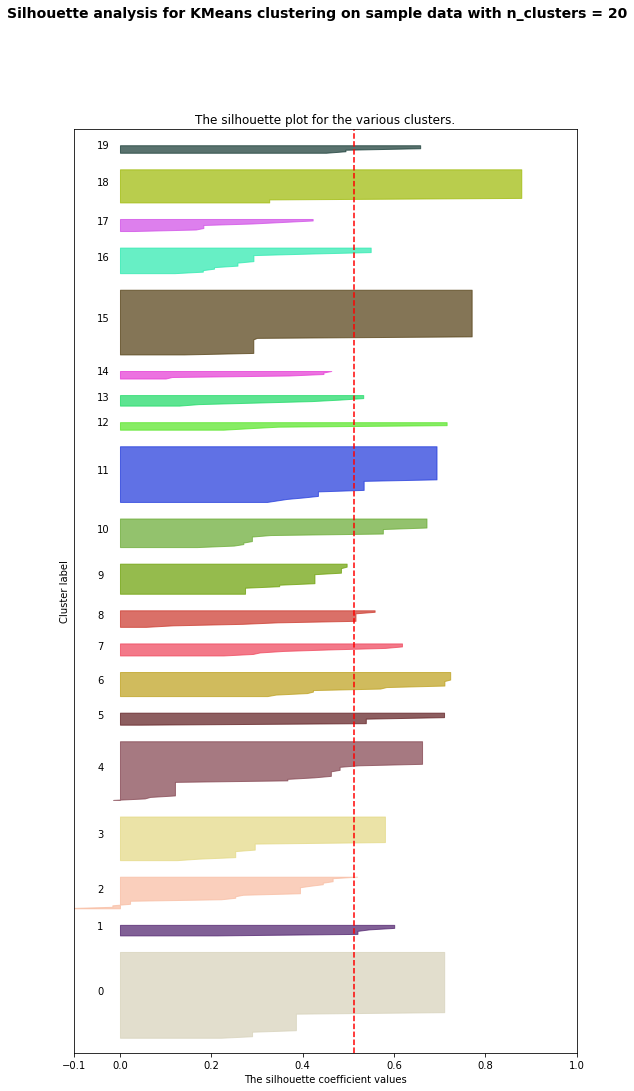

For n_clusters = 30 The average silhouette_score is : 0.5955770610702623


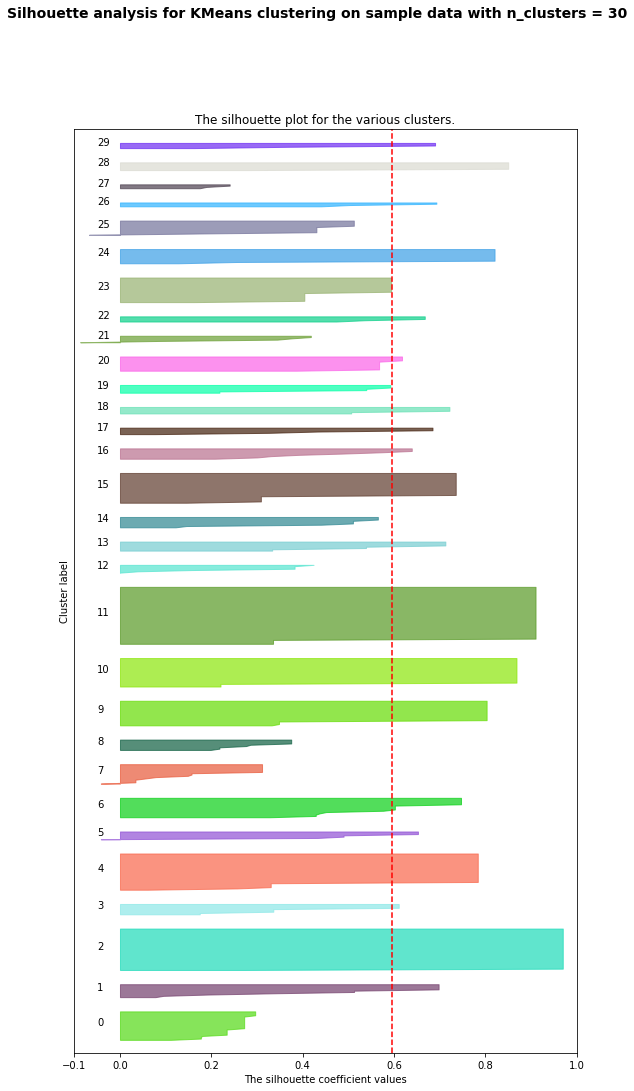

For n_clusters = 40 The average silhouette_score is : 0.6598569442235678


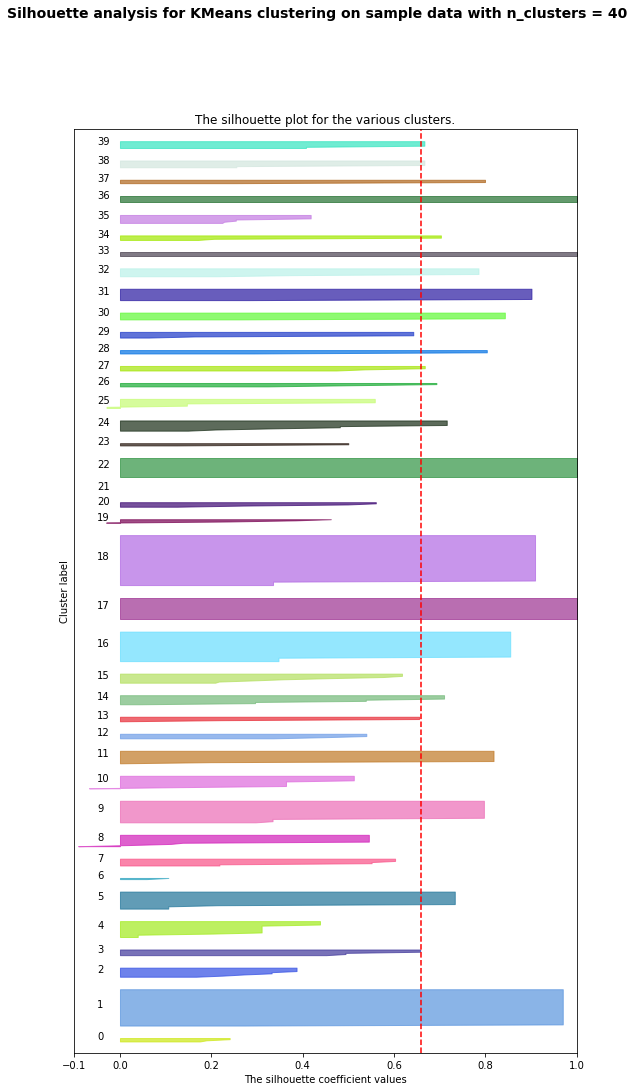

For n_clusters = 50 The average silhouette_score is : 0.7179734522858268


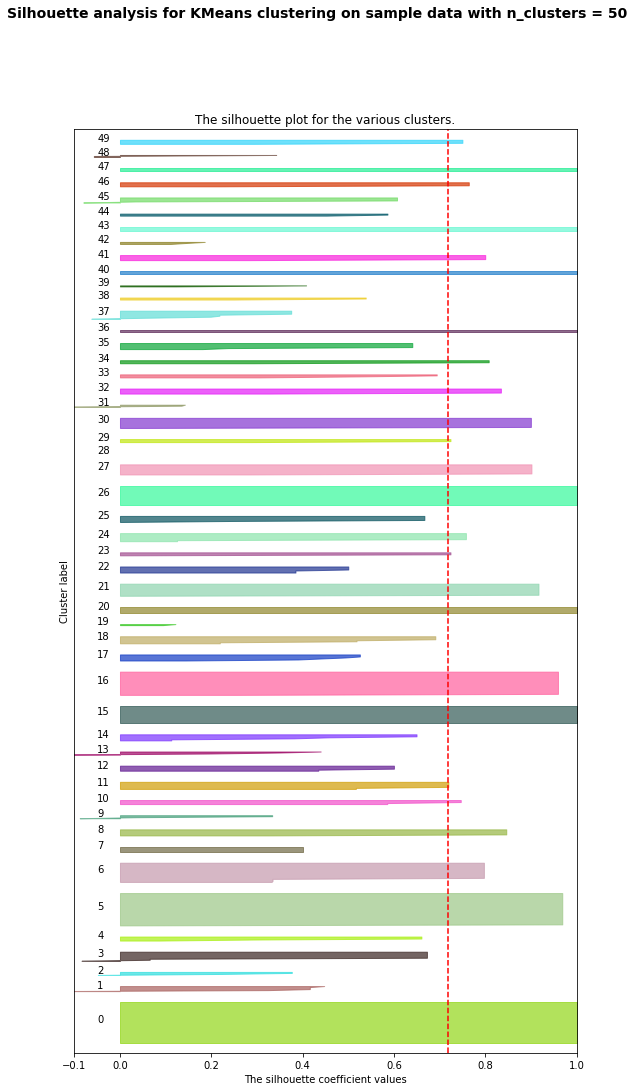

For n_clusters = 60 The average silhouette_score is : 0.7638477254797814


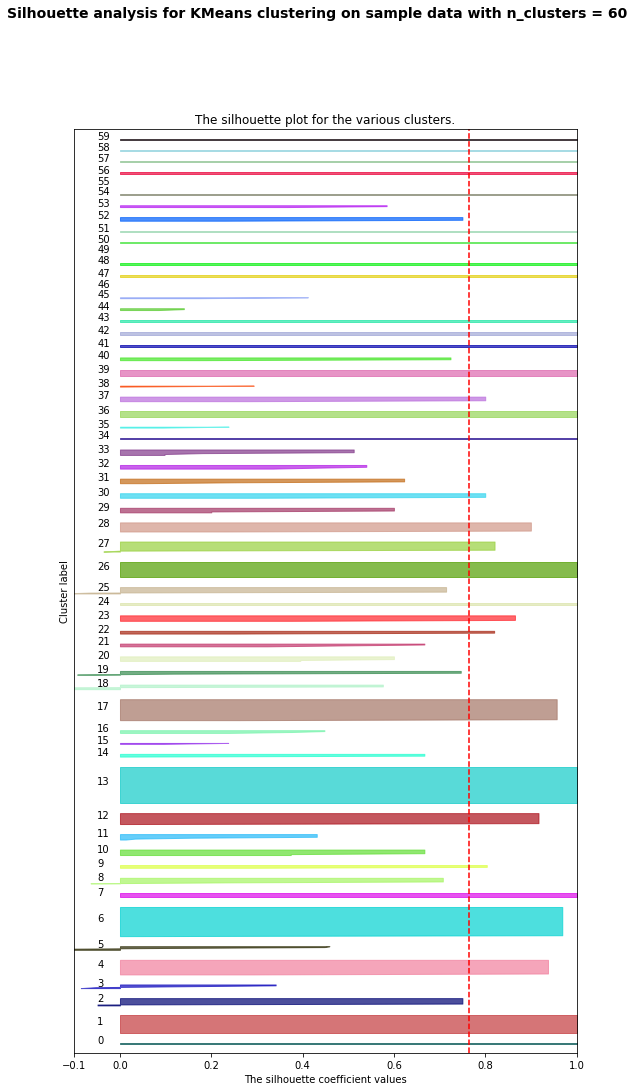

For n_clusters = 70 The average silhouette_score is : 0.7919884972867886


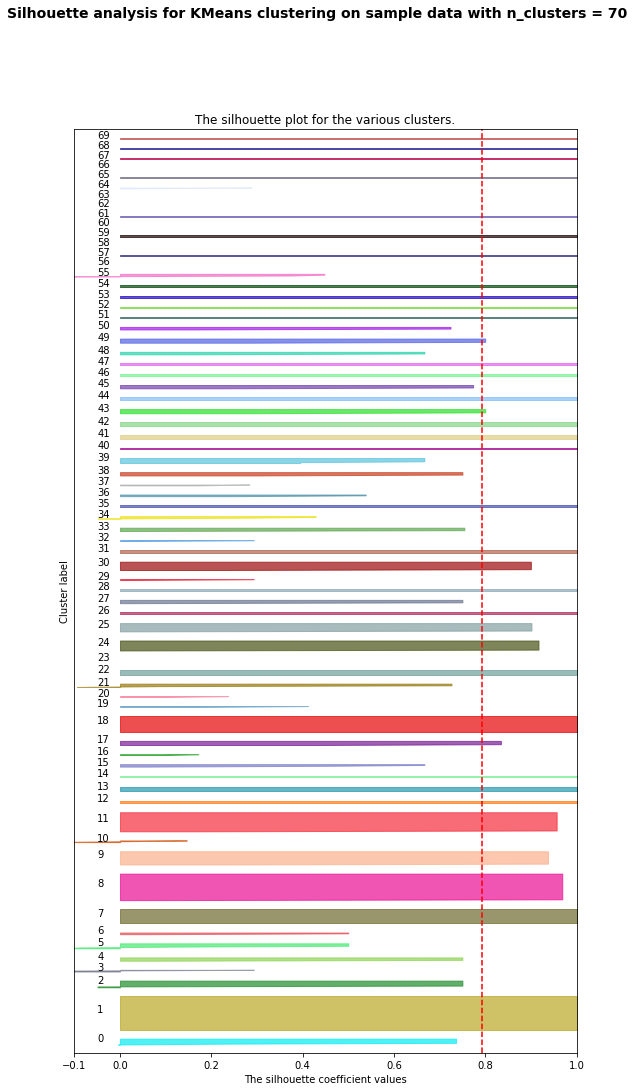

For n_clusters = 80 The average silhouette_score is : 0.8013692529255766


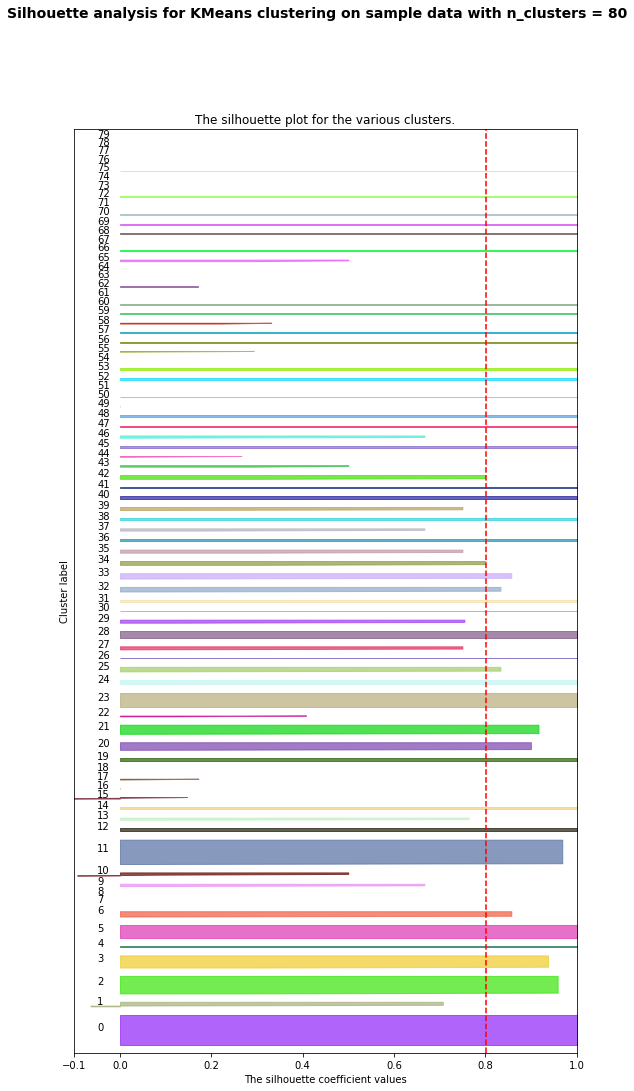

For n_clusters = 115 The average silhouette_score is : 0.849009900990099


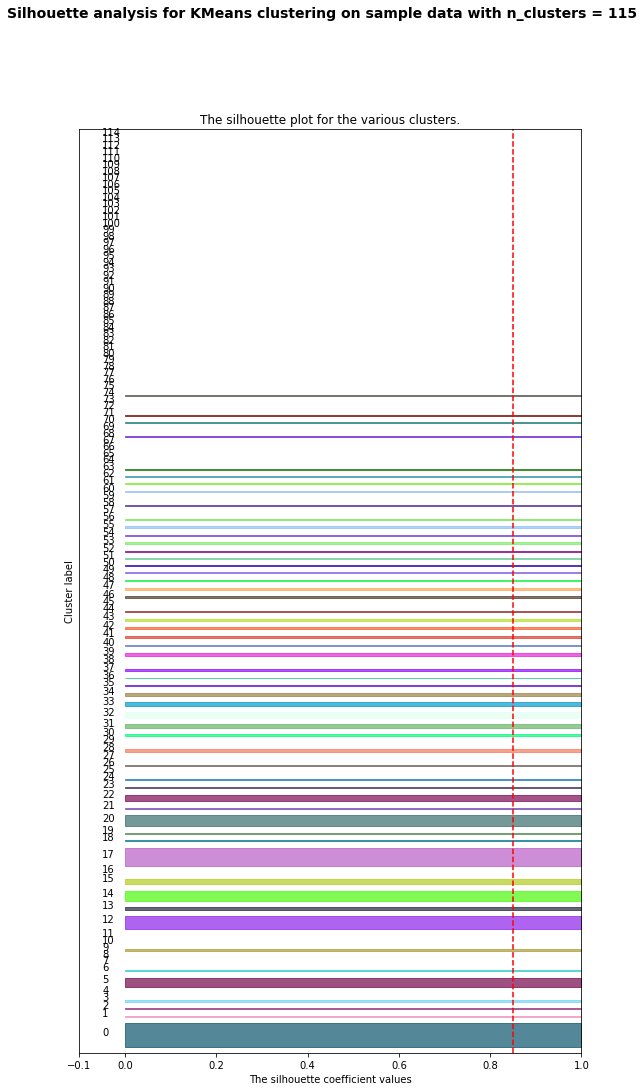

/anaconda3/envs/Py36env/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (116) found smaller than n_clusters (150). Possibly due to duplicate points in X.
  return_n_iter=True)


For n_clusters = 150 The average silhouette_score is : 0.849009900990099


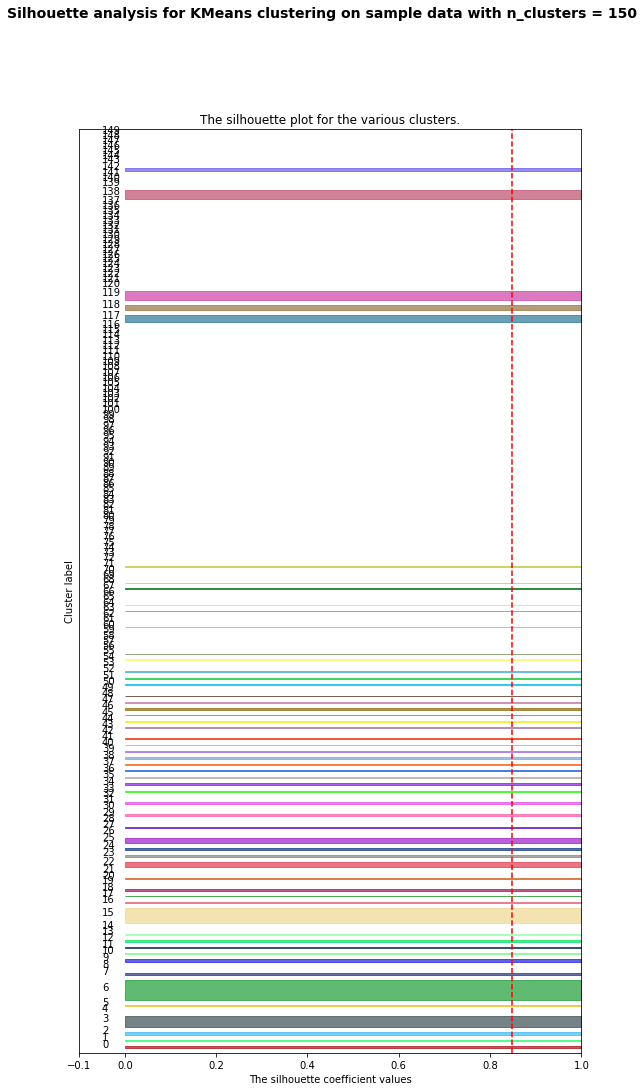

In [977]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## final fit

After you have decided which features to include and the number of clusters you want, fit your final KMeans model. I have **arbitrarily** chosen 5. 

In [1033]:
# set the number of clusters in the final model
my_n_clusters = 67


In [1034]:
km = KMeans(n_clusters=my_n_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=67, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## look at results

The key to knowing if you have chosen the right features and clusters: looking at the images in each cluster and deciding whether they seem to belong together. You could extend this starter code to display the images in this notebook, or you may decide to use Python to write an html file/files to view the images by cluster.

In [1035]:
# for i in range(0, max(km.labels_)+1):
#     print(" ")
#     print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
#     print("Images in cluster: " + str(i))
#     print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
#     for j in range(0, len(km.labels_)):
#         if km.labels_[j] == i:
#             print(str(j+2) + '_small.jpg')

In [1036]:
from IPython.core.display import display, HTML
# display(HTML('<p>Hello, world!</p>'))
# display(HTML('<img src="/notebooks/ML3option_2/img_small/3_small.jpg">'))
# imglist=""
allImg=""
for i in range(0, max(km.labels_)+1):
    print(" ")
    imglist=""
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    print("Images in cluster: " + str(i))
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
#             print(str(j+2) + '_small.jpg')

            imgscr = "img_small/"+str(j+2)+'_small.jpg'
            
#             print(imgscr)
#             imglist.append('<img src ='+ '"'+imgscr+ '" alt ="ss" width ="100" height="130" display="inline">')
#             display(HTML('<img src ='+ '"'+imgscr+ '" alt ="ss" width ="100" height="130" display="inline">'))
            imglist+=('<img src ='+ '"'+imgscr+ '" alt ="ss" width ="120" style="display:inline">')
#             imglistHtml+=('<img src ='+ '"'+imgscrHtml+ '" alt ="ss" width ="100"  style="display:inline">')
#     print(imglist)
    display(HTML(imglist))
    allImg+=("<p>Images in cluster:" + str(i)+ '</p> <div style="display:block">'+imglist+'</div>')
# print(allImg)
#     for p in range (0,len(imglist

 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 0
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 1
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 2
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 3
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 4
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 5
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 6
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 7
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 8
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 9
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 10
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 11
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 12
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 13
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 14
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 15
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 16
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 17
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 18
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 19
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 20
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 21
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 22
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 23
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 24
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 25
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 26
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 27
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 28
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 29
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 30
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 31
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 32
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 33
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 34
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 35
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 36
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 37
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 38
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 39
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 40
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 41
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 42
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 43
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 44
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 45
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 46
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 47
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 48
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 49
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 50
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 51
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 52
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 53
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 54
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 55
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 56
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 57
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 58
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 59
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 60
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 61
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 62
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 63
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 64
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 65
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 66
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


In [1037]:
# write-html.py
# import webbrowser

f = open('ClusterCheck.html','w')

message = """<html>
<head></head>
<body><p>ML3 Option 2 Dan Cluster Image</p>
"""+allImg+"""


</body>
</html>"""


f.write(message)
f.close()

In [1016]:
# /Users/working/Documents/ParsonsSchool/Sp19/MachineLearning/DATASET/img_small 

